In [19]:
import numpy as np
import choix
import opt_fair
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
from matplotlib import colors

In [20]:
size = 100 #number of items
min_size = 30 
maj_size = size - min_size


In [21]:
#init original scores
np.random.seed(43)
original = np.random.normal(0,5 ,size = size); #print(original)


classes = [0] * maj_size + [1] * min_size

In [22]:
max_iters=100
num_revs = 50
trials = 10
revs_bias = np.random.normal(2,2,size = num_revs)

In [23]:
%%time


res = np.zeros(trials)

for i in range(trials):
    
    pairs_per_reviewer = np.random.poisson(100, size=50)
    
    biased_scores = opt_fair._create_matrix_biased_scores(original,revs_bias,classes)
    revs_set =  opt_fair.create_pc_set_for_reviewers_custom(biased_scores,pairs_per_reviewer)

    pc_with_revs = opt_fair.Pairwise_with_rev(data = revs_set, penalty = 0, classes = classes)
    annot_bt,annot_bias =  opt_fair._alternate_optim(size, num_revs, pc_with_revs, iters = max_iters)
    res[i],x = stats.kendalltau(annot_bt,original)
    
print('Results with Poisson distributed number of pairs: Mean=',np.round(np.mean(res),4), 'Std=', np.round(np.std(res),4))

Results with Poisson distributed number of pairs: Mean= 0.9465 Std= 0.0051
CPU times: user 4min 59s, sys: 2min 40s, total: 7min 40s
Wall time: 59 s


In [24]:
%%time

res2 = np.zeros(trials)


for i in range(trials):
    
    pairs_per_reviewer = [100]*50
    
    biased_scores = opt_fair._create_matrix_biased_scores(original,revs_bias,classes)
    revs_set =  opt_fair.create_pc_set_for_reviewers_custom(biased_scores,pairs_per_reviewer)

    pc_with_revs = opt_fair.Pairwise_with_rev(data = revs_set, penalty = 0, classes = classes)
    annot_bt,annot_bias =  opt_fair._alternate_optim(size, num_revs, pc_with_revs, iters = max_iters)
    res2[i],x = stats.kendalltau(annot_bt,original)

print('Results with Unifromly distributed number of pairs: Mean=',np.round(np.mean(res2),4), 'Std=', np.round(np.std(res2),4))

Results with Unifromly distributed number of pairs: Mean= 0.9459 Std= 0.0057
CPU times: user 4min 58s, sys: 2min 40s, total: 7min 38s
Wall time: 1min 1s


In [25]:
%%time


res3 = np.zeros(trials)


for i in range(trials):
    
    pairs_per_reviewer = [10,30,50,70,90,110,130,150,170,190]*5
    biased_scores = opt_fair._create_matrix_biased_scores(original,revs_bias,classes)
    revs_set =  opt_fair.create_pc_set_for_reviewers_custom(biased_scores,pairs_per_reviewer)

    pc_with_revs = opt_fair.Pairwise_with_rev(data = revs_set, penalty = 0, classes = classes)
    annot_bt,annot_bias =  opt_fair._alternate_optim(size, num_revs, pc_with_revs, iters = max_iters)
    res3[i],x = stats.kendalltau(annot_bt,original)

print('Results with 10,30.. distributed number of pairs: Mean=',np.round(np.mean(res3),4), 'Std=', np.round(np.std(res3),4))

Results with 10,30.. distributed number of pairs: Mean= 0.9493 Std= 0.005
CPU times: user 4min 46s, sys: 2min 43s, total: 7min 30s
Wall time: 58.9 s


In [26]:
%%time


res4 = np.zeros(trials)


for i in range(trials):
    
    pairs_per_reviewer = [5,195]*25
    biased_scores = opt_fair._create_matrix_biased_scores(original,revs_bias,classes)
    revs_set =  opt_fair.create_pc_set_for_reviewers_custom(biased_scores,pairs_per_reviewer)

    pc_with_revs = opt_fair.Pairwise_with_rev(data = revs_set, penalty = 0, classes = classes)
    annot_bt,annot_bias =  opt_fair._alternate_optim(size, num_revs, pc_with_revs, iters = max_iters)
    res4[i],x = stats.kendalltau(annot_bt,original)

print('Results with 5 or 195 distributed number of pairs: Mean=',np.round(np.mean(res4),4), 'Std=', np.round(np.std(res4),4))

Results with 5 or 195 distributed number of pairs: Mean= 0.9446 Std= 0.0067
CPU times: user 4min 46s, sys: 2min 46s, total: 7min 33s
Wall time: 59.2 s


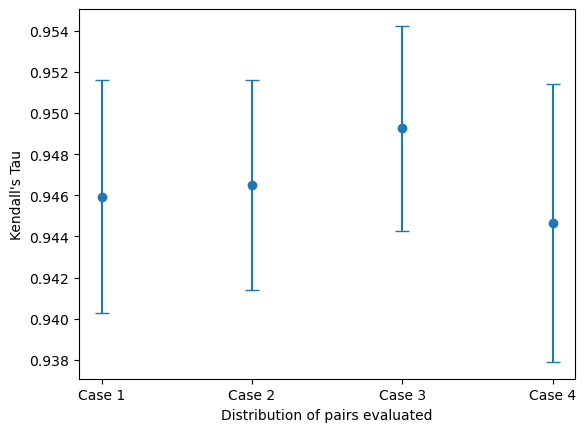

In [27]:
import matplotlib.pyplot as plt

res_means = [ np.mean(res2), np.mean(res), np.mean(res3), np.mean(res4)] #uniform, poisson 10,30,50,etc, 5or195
res_stds = [ np.std(res2),np.std(res), np.std(res3), np.std(res4)]

labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']

plt.errorbar(labels, res_means, yerr=res_stds, fmt='o', capsize=5)

plt.xlabel('Distribution of pairs evaluated')
plt.ylabel("Kendall's Tau")
#plt.title('Means of Variables with Error Bars')

plt.show()
